In [1]:
import sys
from ezr import *

In [22]:
import random
import matplotlib.pyplot as plt
import numpy as np
import os

def smo(i: data, score=lambda B, R: B - R, callBack=lambda x: x):
    "Sequential model optimization."

    def _ranked(lst: rows) -> rows:
        "Sort `lst` by distance to heaven. Called by `_smo1()`."
        lst = sorted(lst, key=lambda r: d2h(i, r))
        return lst

    def _guess(todo: rows, done: rows) -> rows:
        "Divide `done` into `best`, `rest`. Use those to guess the order of unlabelled rows. Called by `_smo1()`."
        cut = int(.5 + len(done) ** the.N)
        best = clone(i, done[:cut])
        rest = clone(i, done[cut:])
        print([len(best.rows),len(rest.rows)])
        key = lambda r: score(loglikes(best, r, len(done), 2),
                              loglikes(rest, r, len(done), 2))
        if the.GuessFaster:
            random.shuffle(todo)
            todo = sorted(todo[:the.any], key=key, reverse=True) + todo[the.any:]
            return todo[:int(len(todo) * the.beam)]
        else:
            return sorted(todo, key=key, reverse=True)

    def _smo1(todo: rows, done: rows) -> rows:
        val_list = []
        "Guess the `top`  unlabeled row, add that to `done`, resort `done`, and repeat"
        for k in range(40):
            if len(todo) < 3:
                break
            top, *todo = _guess(todo, done)
            done += [top]
            done = _ranked(done)
            val = d2h(i, top)
            val_list.append(val)
        return val_list

    def _smo_early_stopping(todo, done):
        "Guess the `top` unlabeled row, add that to `done`, resort `done`, and repeat"
        best_val, counter = None, 0
        val_list = []
        
        for k in range(30):
            if len(todo) < 3 or counter >= 10:
                break
            top, *todo = _guess(todo, done)
            val = d2h(i, top)
            val_list.append(val)
            if best_val is None or val < best_val:
                best_val, counter = val, 0
            else:
                counter += 1
            done = _ranked(done + [top])
            
        return val_list

    random.shuffle(i.rows)
    act = _smo1
    return act(i.rows[the.label:], _ranked(i.rows[:the.label]))

Number of rows: 192


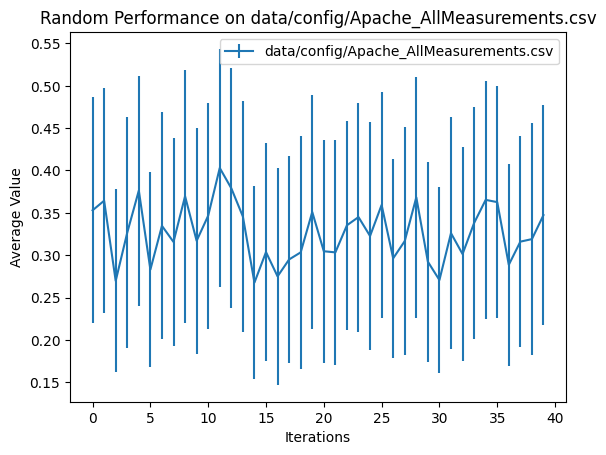

Number of rows: 259


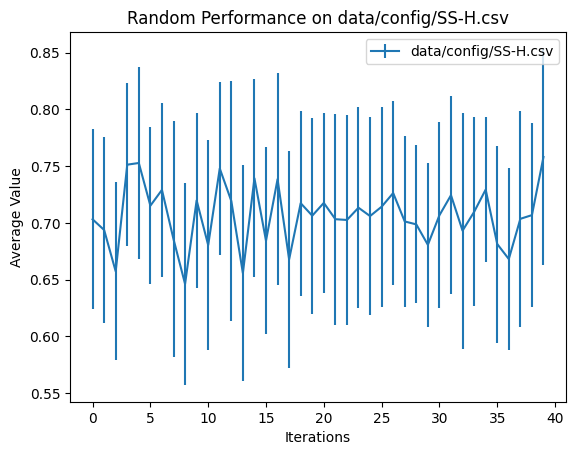

Number of rows: 1080


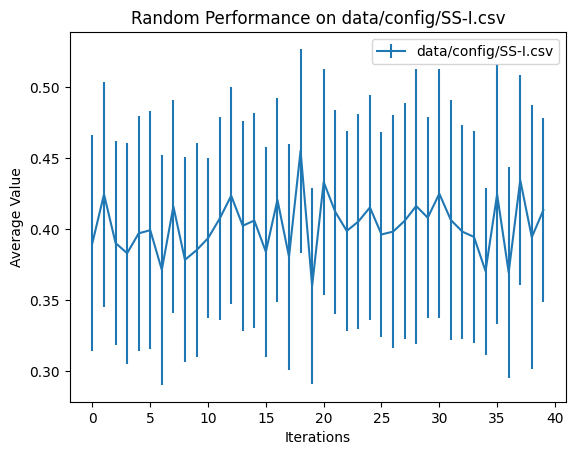

Number of rows: 972


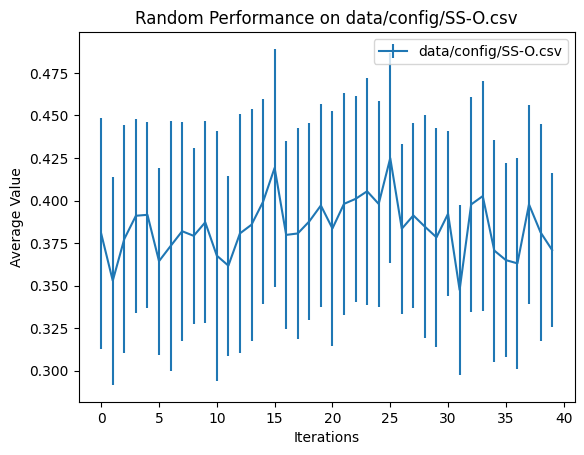

Number of rows: 864


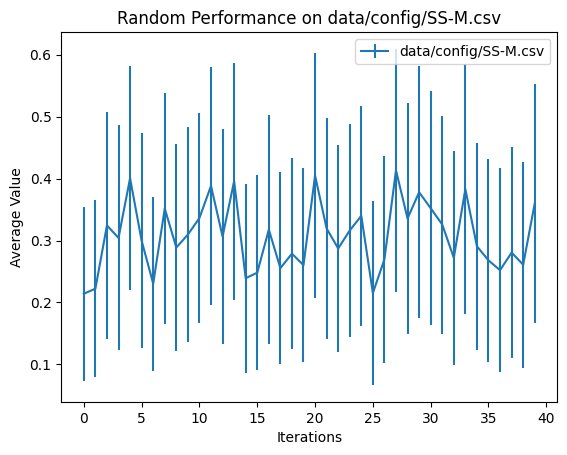

In [11]:
num_trials = 50
config_folder = 'data/config'
datasets = [os.path.join(config_folder, file) for file in os.listdir(config_folder) if file.endswith('.csv')]

for dataset in datasets[:10]:
    all_val_lists = []

    d = DATA(csv(dataset))

    if len(d.rows) > 2000:
        continue

    print(f'Number of rows: {len(d.rows)}')
    
    for _ in range(num_trials):
        val_list = smo(d, score=lambda B, R: 1)
        all_val_lists.append(val_list)
    
    max_len = max(len(lst) for lst in all_val_lists)
    avg_val_list = [0] * max_len
    std_val_list = [0] * max_len
    
    for lst in all_val_lists:
        for i in range(len(lst)):
            avg_val_list[i] += lst[i]
    
    avg_val_list = [val / num_trials for val in avg_val_list]
    
    for i in range(max_len):
        std_val_list[i] = 0.5 * np.std([lst[i] if i < len(lst) else 0 for lst in all_val_lists])
    
    # Plotting the average values with standard deviation
    plt.errorbar(range(max_len), avg_val_list, yerr= std_val_list, label=dataset)
    plt.xlabel('Iterations')
    plt.ylabel('Average Value')
    plt.title(f'Random Performance on {dataset}')
    plt.legend()
    plt.show()

Number of rows: 192


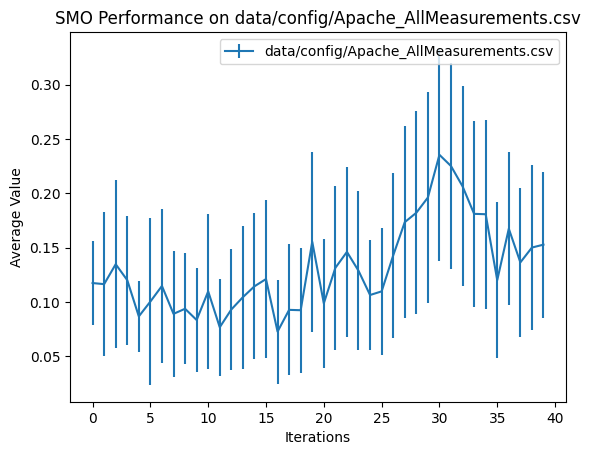

Number of rows: 259


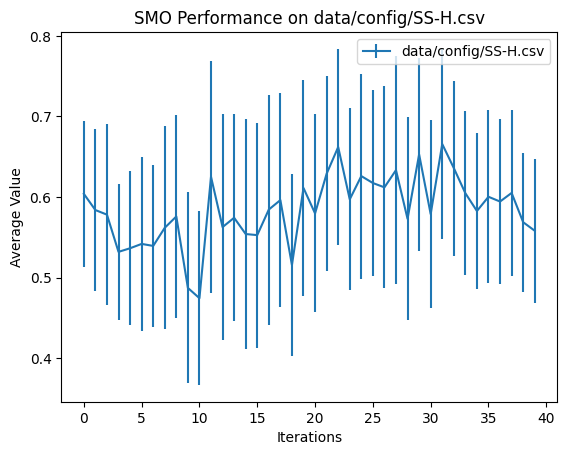

Number of rows: 1080


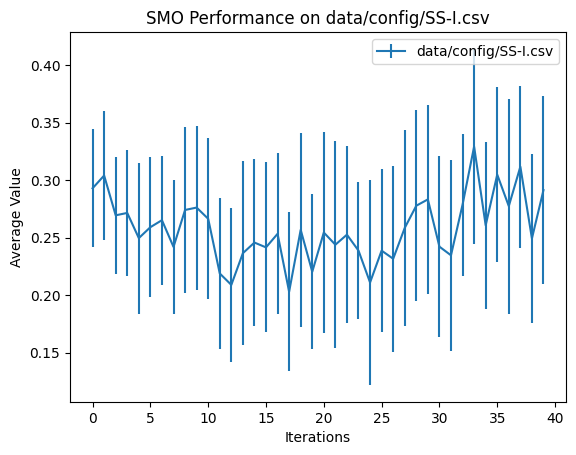

Number of rows: 972


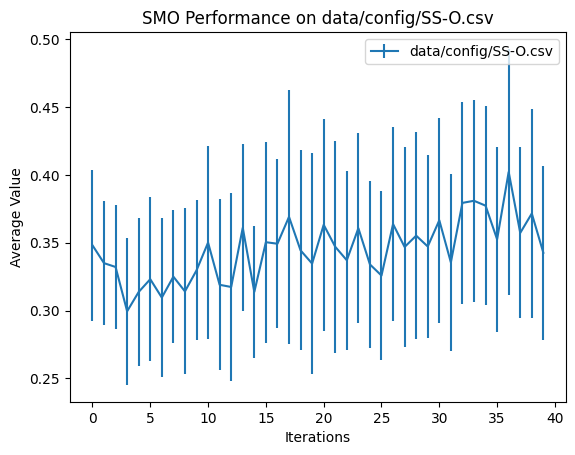

Number of rows: 864


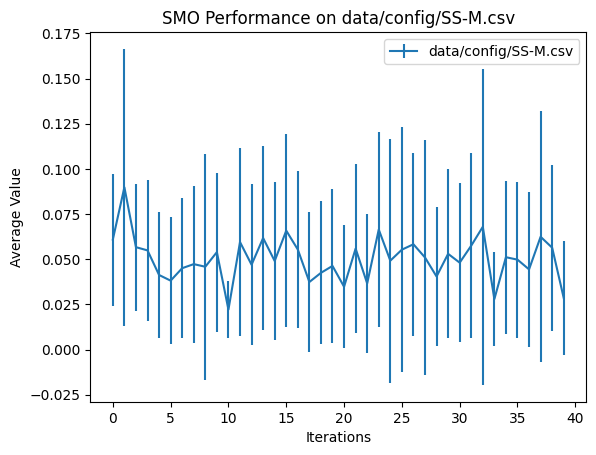

In [10]:
num_trials = 50
config_folder = 'data/config'
datasets = [os.path.join(config_folder, file) for file in os.listdir(config_folder) if file.endswith('.csv')]

for dataset in datasets[:10]:
    all_val_lists = []

    d = DATA(csv(dataset))

    if len(d.rows) > 2000:
        continue
        
    print(f'Number of rows: {len(d.rows)}')

    for _ in range(num_trials):
        val_list = smo(d)
        all_val_lists.append(val_list)
    
    max_len = max(len(lst) for lst in all_val_lists)
    avg_val_list = [0] * max_len
    std_val_list = [0] * max_len
    
    for lst in all_val_lists:
        for i in range(len(lst)):
            avg_val_list[i] += lst[i]
    
    avg_val_list = [val / num_trials for val in avg_val_list]
    
    for i in range(max_len):
        std_val_list[i] = 0.5 * np.std([lst[i] if i < len(lst) else 0 for lst in all_val_lists])
    
    # Plotting the average values with standard deviation
    plt.errorbar(range(max_len), avg_val_list, yerr= std_val_list, label=dataset)
    plt.xlabel('Iterations')
    plt.ylabel('Average Value')
    plt.title(f'SMO (Exploit) Performance on {dataset}')
    plt.legend()
    plt.show()

Number of rows: 192
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[

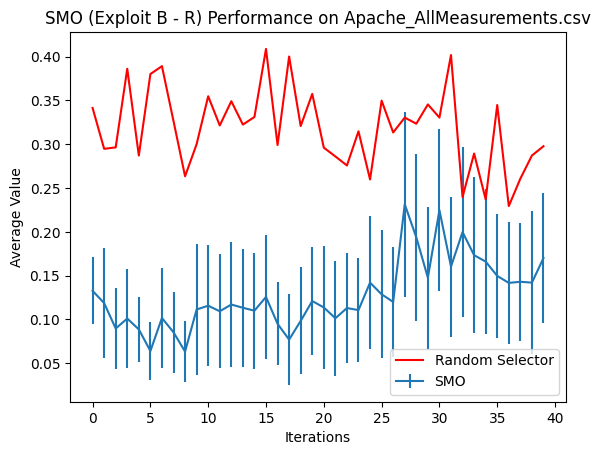

Number of rows: 259
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[

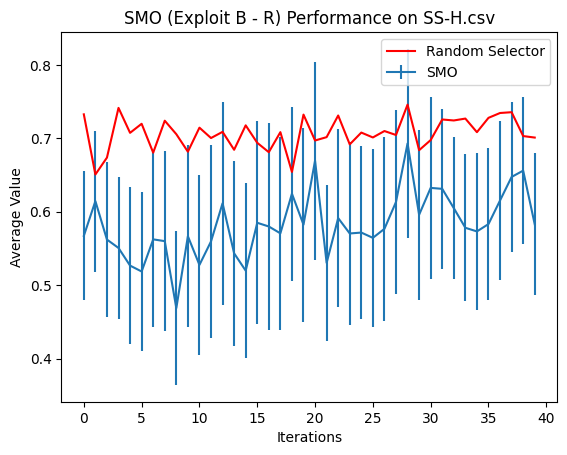

Number of rows: 1080
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]


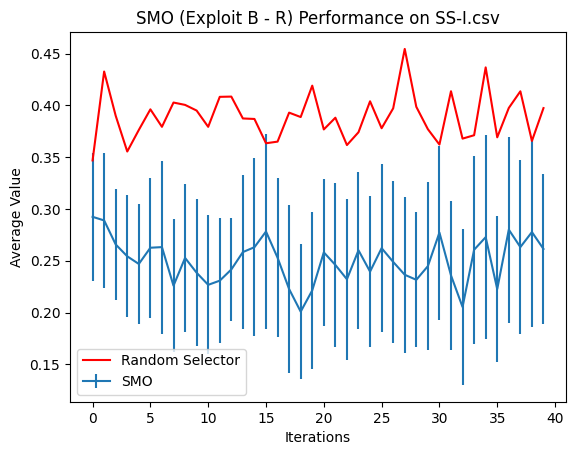

Number of rows: 972
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[

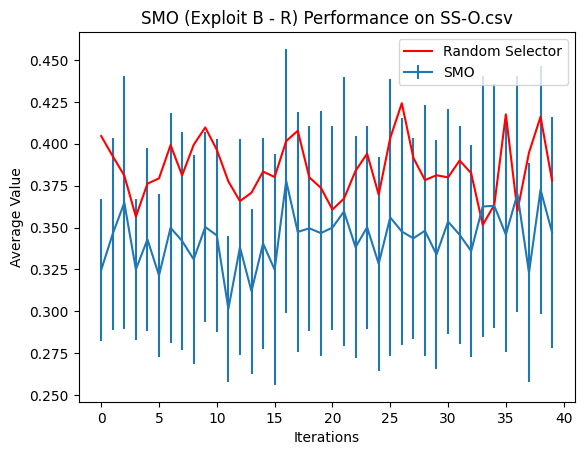

Number of rows: 864
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 9]
[4, 10]
[4, 11]
[4, 12]
[4, 13]
[4, 14]
[4, 15]
[4, 16]
[5, 16]
[5, 17]
[5, 18]
[5, 19]
[5, 20]
[5, 21]
[5, 22]
[5, 23]
[5, 24]
[5, 25]
[6, 25]
[6, 26]
[6, 27]
[6, 28]
[6, 29]
[6, 30]
[6, 31]
[6, 32]
[6, 33]
[6, 34]
[6, 35]
[6, 36]
[7, 36]
[2, 2]
[2, 3]
[2, 4]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[

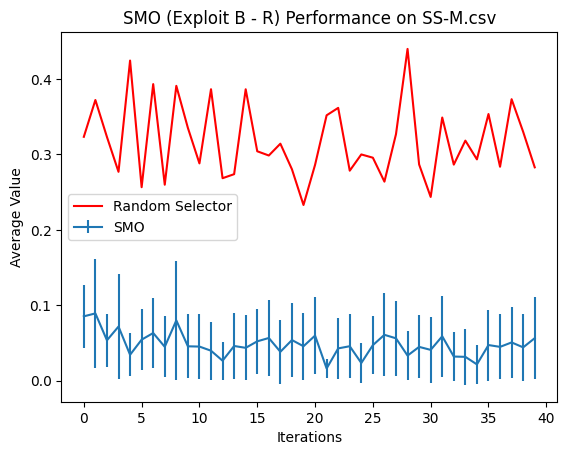

In [23]:
num_trials = 50
config_folder = 'data/config'
datasets = [os.path.join(config_folder, file) for file in os.listdir(config_folder) if file.endswith('.csv')]

for dataset in datasets[:10]:
    all_val_lists = []

    d = DATA(csv(dataset))

    if len(d.rows) > 2000:
        continue
        
    print(f'Number of rows: {len(d.rows)}')

    for _ in range(num_trials):
        val_list = smo(d)
        all_val_lists.append(val_list)
    
    max_len = max(len(lst) for lst in all_val_lists)
    avg_val_list = [0] * max_len
    std_val_list = [0] * max_len
    
    for lst in all_val_lists:
        for i in range(len(lst)):
            avg_val_list[i] += lst[i]
    
    avg_val_list = [val / num_trials for val in avg_val_list]
    
    for i in range(max_len):
        std_val_list[i] = 0.5 * np.std([lst[i] if i < len(lst) else 0 for lst in all_val_lists])
    
    # Run multiple trials with a 'random' selector
    random_all_val_lists = []

    for _ in range(num_trials):
        random_val_list = smo(d, score=lambda B, R: random.random())
        random_all_val_lists.append(random_val_list)

    avg_random_val = [0] * max_len

    for lst in random_all_val_lists:
        for i in range(len(lst)):
            avg_random_val[i] += lst[i]

    avg_random_val = [val / num_trials for val in avg_random_val]

    # Plotting the average values with standard deviation
    plt.errorbar(range(max_len), avg_val_list, yerr=std_val_list, label='SMO')
    plt.plot(range(max_len), avg_random_val, 'r-', label='Random Selector')
    plt.xlabel('Iterations')
    plt.ylabel('Average Value')
    plt.title(f'SMO (Exploit B - R) Performance on {os.path.basename(dataset)}')
    plt.legend()
    plt.show()